In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sensors import *

In [33]:
def err(G, sensors, labels, i):
#     if len(set(sensors[:i])) != i:
#         raise ValueError("Incorrect number of sensors:", len(set(sensors[:i])))
    preds = flow_prediction_nls(G, {s: labels[s] for s in sensors[:i]})
    return mse(preds, labels)

In [40]:
def plot_results(G, labeled_flows, ratio, samples=100):
    k = int(G.number_of_edges() * ratio)
    
    greedy_sensors = choose_sensors(G, labeled_flows, flow_prediction, mse, lazy=True, cores=8, k=k)
    random_sensors = choose_sensors_random(G, k=k)
    rrqr_sensors = al_flows_rrqr(G, ratio)
    rb_sensors_undirected = al_flows_rb(G.to_undirected(), ratio)
    
    rb_sensors = []
    for u, v in rb_sensors_undirected:
        if ((u, v) in G.edges()):
            rb_sensors.append((u, v))
        else:
            rb_sensors.append((v, u))
            
    if len(set(rb_sensors)) != int(G.number_of_edges() * ratio):
        print("error: expected", int(G.number_of_edges() * ratio), "edges but got", len(set(rb_sensors)))
        return
    
    greedy, rand, rrqr, rb = {}, {}, {}, {}

    for j in tqdm(range(samples)):
        i = int(k * j / samples)
        
        greedy[i] = err(G, greedy_sensors, labeled_flows, i)
        rand[i] = err(G, random_sensors, labeled_flows, i)
        rrqr[i] = err(G, rrqr_sensors, labeled_flows, i)
        rb[i] = err(G, rb_sensors, labeled_flows, i)
        
    fig, ax = plt.subplots()
    
    ax.plot([k / G.number_of_edges() for k in greedy.keys()], greedy.values(), "b", label="Greedy")
    ax.plot([k / G.number_of_edges() for k in rand.keys()], rand.values(), "r", label="Random")
    ax.plot([k / G.number_of_edges() for k in rrqr.keys()], rrqr.values(), "g", label="RRQR")
    ax.plot([k / G.number_of_edges() for k in rb.keys()], rb.values(), "m", label="RB")
    
    ax.legend()
    plt.xlabel("Ratio Labeled")
    plt.ylabel("MSE")
    plt.grid("on")

In [31]:
def read_tntp_graph(filename):
    edgelist = pd.read_csv(filename, sep="\t")
    G = nx.from_pandas_edgelist(edgelist, source="From ", target="To ", edge_attr="Volume ",
                           create_using=nx.DiGraph)
    labeled_flows = {(u,v) : d["Volume "] for u,v,d in G.edges(data=True)}
    plot_results(G, labeled_flows, .1)

In [41]:
read_tntp_graph("data/Anaheim/Anaheim_flow.tntp")
#plt.savefig("Anaheim_results.pdf")
plt.show()

  0%|          | 0/91 [00:00<?, ?it/s]

error: expected 91 edges but got 51


  0%|          | 0/2522 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

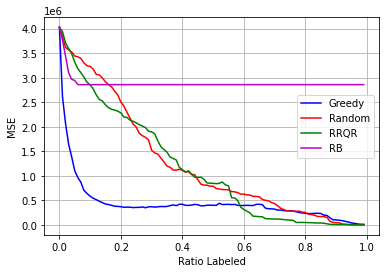

In [16]:
read_tntp_graph("data/Barcelona/Barcelona_flow.tntp")
plt.savefig("Barcelona_results.pdf")
plt.show()

  0%|          | 0/2950 [00:00<?, ?it/s]

[(565, 568), (565, 569), (631, 571), (632, 571), (632, 502), (633, 503), (699, 700), (699, 701), (703, 705), (704, 706), (732, 733), (732, 864), (913, 864), (410, 700), (538, 474), (411, 695), (413, 734), (414, 735), (415, 733), (478, 477), (498, 533), (499, 569), (500, 570), (501, 571), (501, 502), (587, 592), (587, 400), (604, 399), (606, 403), (675, 404), (677, 406), (687, 407), (689, 408), (699, 538), (767, 777), (773, 775), (773, 424), (776, 590), (776, 775), (398, 399), (398, 400), (398, 403), (401, 590), (401, 400), (410, 409), (423, 424), (695, 411), (700, 699), (700, 410), (701, 699), (701, 474), (733, 732), (733, 415), (734, 413), (735, 414), (813, 473), (815, 638), (826, 638), (826, 825), (827, 651), (827, 825), (842, 651), (842, 841), (843, 665), (843, 841), (848, 447), (864, 732), (864, 913), (887, 859), (887, 888), (893, 894), (446, 859), (446, 447), (454, 453), (472, 473), (699, 700), (699, 701), (732, 733), (732, 864), (913, 864), (410, 700), (411, 695), (413, 734), (41

  0%|          | 0/100 [00:00<?, ?it/s]

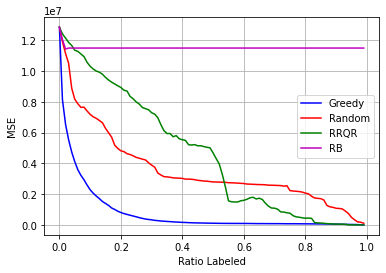

In [24]:
read_tntp_graph("data/Chicago-Sketch/ChicagoSketch_flow.tntp")
plt.savefig("Chicago_results.pdf")
plt.show()

  0%|          | 0/2836 [00:00<?, ?it/s]

[(162, 163), (536, 841), (164, 163), (181, 514), (205, 839), (264, 871), (270, 356), (374, 373), (389, 387), (389, 388), (437, 474), (438, 439), (510, 504), (510, 509), (475, 474), (1029, 5), (504, 510), (700, 698), (804, 803), (357, 356), (355, 357), (358, 925), (927, 358), (373, 374), (387, 389), (388, 389), (439, 438), (474, 437), (474, 475), (509, 510), (625, 624), (624, 627), (626, 622), (1028, 1025), (654, 653), (699, 698), (697, 699), (717, 718), (729, 728), (750, 747), (748, 749), (821, 801), (1045, 988), (1026, 1009), (1026, 1025), (1027, 1025), (262, 261), (212, 227), (260, 26), (260, 259), (1049, 1050), (223, 225), (265, 266), (270, 269), (270, 271), (5, 1029), (1009, 1026), (653, 654), (718, 717), (728, 729), (803, 804), (801, 821), (357, 356), (355, 357), (358, 925), (624, 625), (624, 627), (626, 622), (700, 698), (698, 699), (697, 699), (748, 749), (750, 747), (927, 358), (988, 1045), (1025, 1028), (1026, 1025), (1025, 1027), (262, 263), (839, 840), (839, 10), (163, 527),

  0%|          | 0/100 [00:00<?, ?it/s]

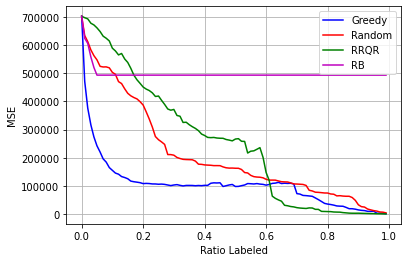

In [25]:
read_tntp_graph("data/Winnipeg/Winnipeg_flow.tntp")
plt.savefig("Winnipeg_results.pdf")
plt.show()